# Análise de Dados do Titanic

## 1. Importando as Bibliotecas e carregando dos Dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Titanic-Dataset.csv')

## 2. Análise exploratória e tratamento dos Dados

In [11]:
print(df.info())
df.fillna({'Age':  df['Age'].median()}, inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)
print('Dados após a limpeza:')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB
None
Dados após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   

## 3. Calculando Taxas de Sobrevivência

In [6]:
# Taxa de sobrevivência por sexo
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print('Taxa de sobrevivência por sexo:')
print(survival_by_sex)

# Taxa de sobrevivência por classe
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print('Taxa de sobrevivência por classe:')
print(survival_by_class)

# Taxa de sobrevivência por idade
bins = [0, 12, 18, 35, 60, 81]
labels = ['Criança (0-12)', 'Adolescente (13-18)', 'Adulto (19-35)', 'Meia-idade (36-60)', 'Idoso (61-80)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
survival_by_age = df.groupby('AgeGroup')['Survived'].mean()
print('Taxa de sobrevivência por faixa etária:')
print(survival_by_age)

Taxa de sobrevivência por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Taxa de sobrevivência por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Taxa de sobrevivência por faixa etária:
AgeGroup
Criança (0-12)         0.573529
Adolescente (13-18)    0.488889
Adulto (19-35)         0.344383
Meia-idade (36-60)     0.416268
Idoso (61-80)          0.269231
Name: Survived, dtype: float64


/tmp/ipython-input-6-1678043433.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean()


## 4. Visualizações com Matplotlib

### Gráfico de Pizza: Distribuição de Sobreviventes

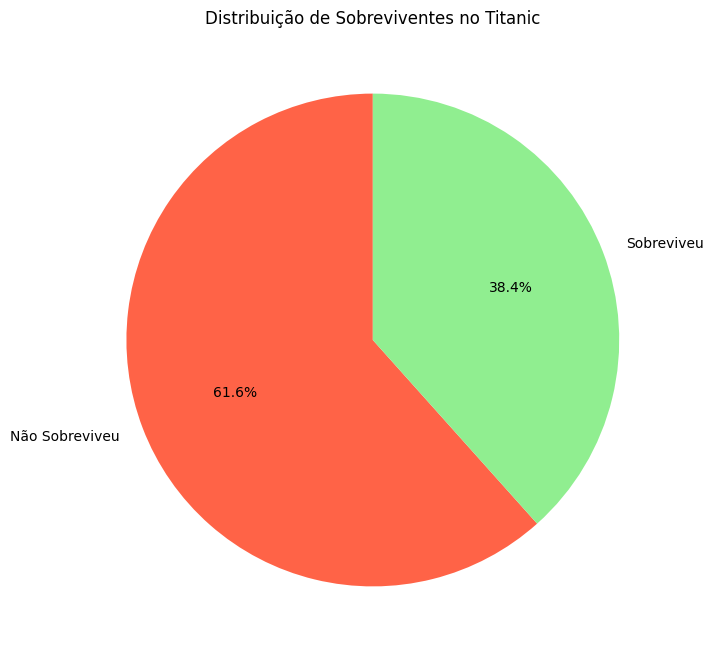

In [12]:
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=['Não Sobreviveu', 'Sobreviveu'], autopct='%1.1f%%', startangle=90, colors=['tomato', 'lightgreen'])
plt.title('Distribuição de Sobreviventes no Titanic')
plt.ylabel('')
plt.show()

### Gráfico de Dispersão: Idade x Tarifa

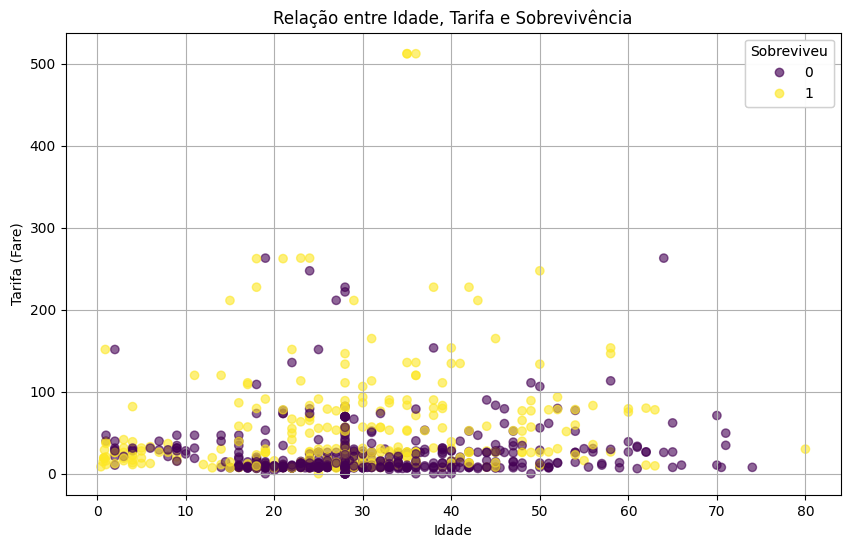

In [13]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Fare'], alpha=0.6, c=df['Survived'], cmap='viridis')
plt.title('Relação entre Idade, Tarifa e Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa (Fare)')
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title='Sobreviveu')
plt.gca().add_artist(legend1)
plt.show()

Percebemos que uma pequena tendência de quanto mais o foi pago pelo passageiro e quanto mais próximo do meio da fase adulta (25-40 anos), maiores são as chances de ter sobrevivido.

### Gráfico de Linha: Taxa de Sobrevivência por Faixa Etária

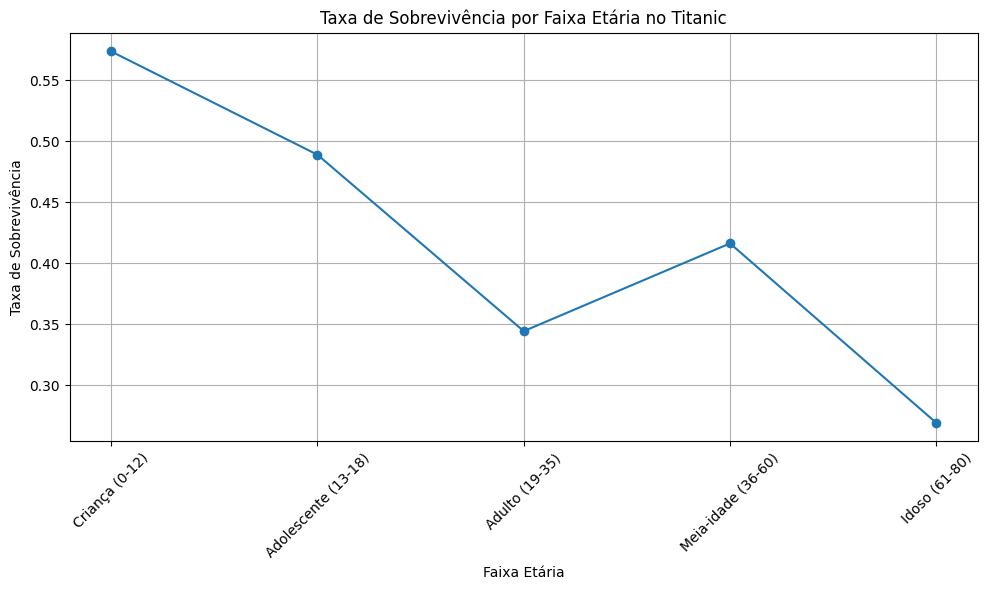

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(survival_by_age.index, survival_by_age.values, marker='o', linestyle='-')
plt.title('Taxa de Sobrevivência por Faixa Etária no Titanic')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gráfico de Barras: Sobrevivência por Sexo e Classe

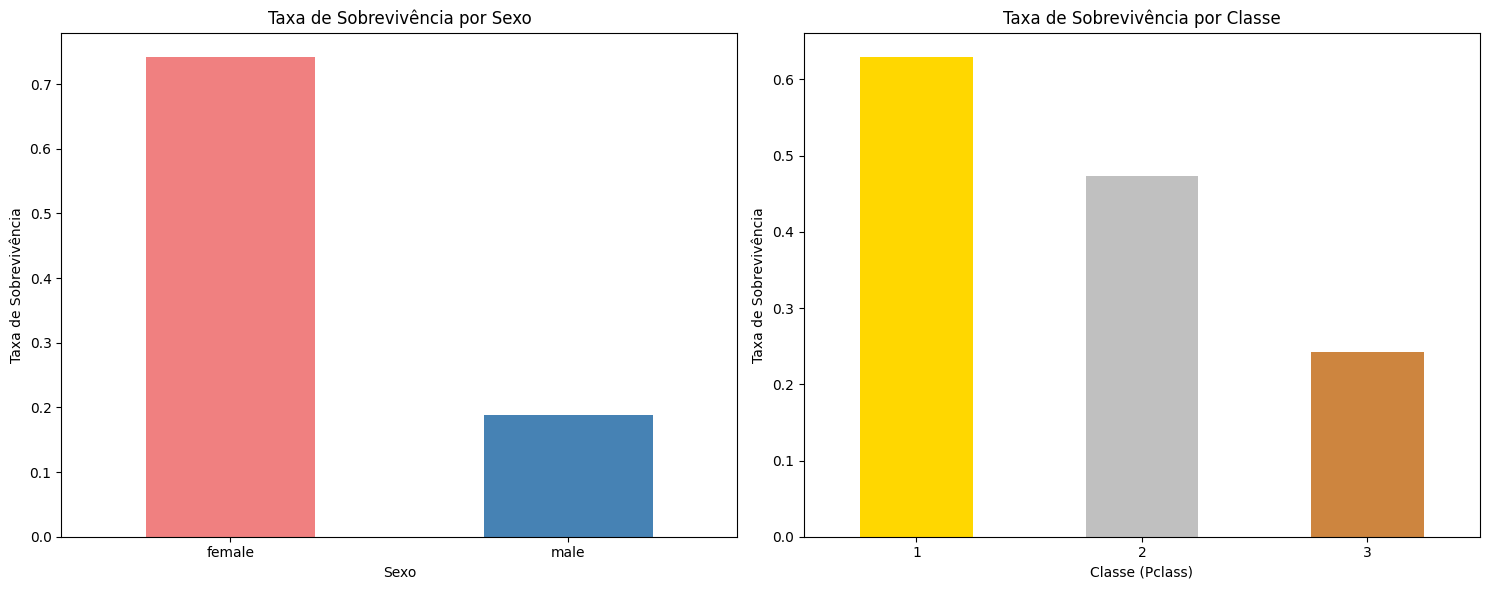

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

survival_by_sex.sort_values(ascending=False).plot(kind='bar', ax=ax1, color=['lightcoral', 'steelblue'])
ax1.set_title('Taxa de Sobrevivência por Sexo')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Taxa de Sobrevivência')
ax1.tick_params(axis='x', rotation=0)

survival_by_class.sort_values(ascending=False).plot(kind='bar', ax=ax2, color=['gold', 'silver', 'peru'])
ax2.set_title('Taxa de Sobrevivência por Classe')
ax2.set_xlabel('Classe (Pclass)')
ax2.set_ylabel('Taxa de Sobrevivência')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Analisando o gráfico de sobrevivência por faixa etária, por sexo e por classe. Podemos perceber que a maior taxa de mortalidade esteve entre homens adultos (19-35 anos) de classe mais baixa.